# Random Forests

Random forests are an ensemble learning method. Ensemble methods use multiple learning algorithms to obtain better predictive performance than could be obtained for any of the constituent learning algorithms.

Random forests work by constructing multiple decision trees and combining the trees. The algorithm was developed by [Leo Breiman](https://en.wikipedia.org/wiki/Leo_Breiman) and Adele Cutler and "Random Forests" is their trademark.

Random forests correct for decision trees' habit of overfitting to their training data set.

In [2]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
from matplotlib.colors import ListedColormap
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier

from IPython.core.display import HTML
#HTML("<style>.container { width:100% !important; }</style>")

The tendency of overfitting with decision trees can be demonstrated with the Iris data set.

In [3]:
from sklearn import datasets
iris = datasets.load_iris()

The Iris data set has four features (sepal length, sepal width, petal length, petal width) which can be used to classify Iris flowers into three species denoted as "0", "1", "2" (setosa, versicolor, virginica)

In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species_names'] = df.species
df.replace({'species_names':{
            0:iris['target_names'][0],
            1:iris['target_names'][1],
            2:iris['target_names'][2]            
        }}, inplace=True)
df.columns = [item.replace(' (cm)', '') for item in df.columns]
df.head()

,sepal length,sepal width,petal length,petal width,species,species_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


The scatter plot shows the three species of Iris in different colors plotted with the petal length and petal width on the y axis

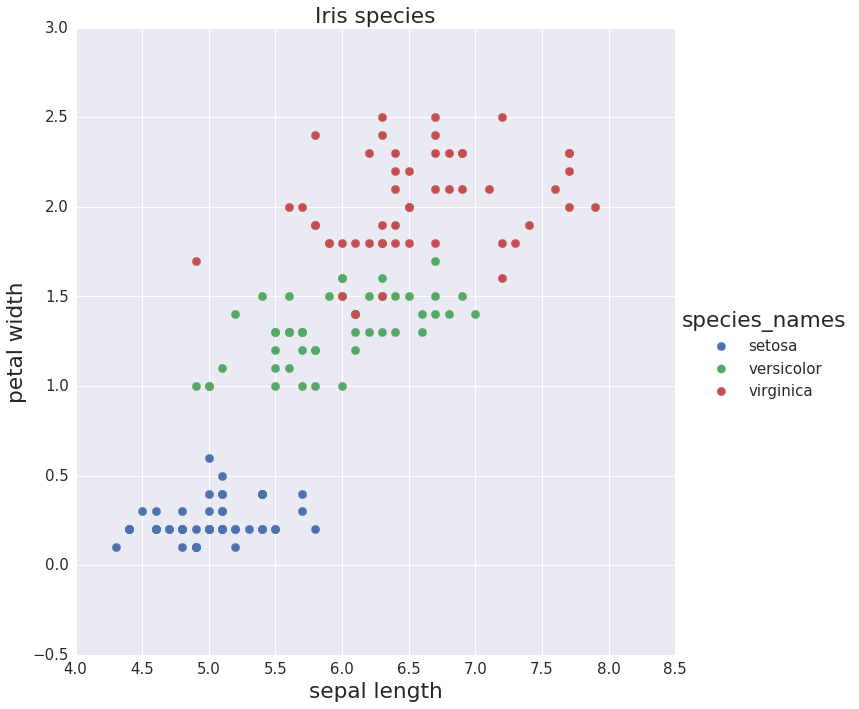

In [9]:
plt.rcParams.update({'axes.labelsize': 'large'})
plt.rcParams.update({'axes.titlesize': 'large'})

g = sns.FacetGrid(df, hue='species_names', size=10)
g.map(plt.scatter, 'sepal length', 'petal width', s=70)
g.add_legend()
g.fig.gca().set_title('Iris species')

A decision tree is used to predict the species using just two of the features: "sepal length" and "petal width"

In [11]:
from sklearn import tree
X = df[['sepal length', 'petal width']].values
y = df.species

Using a mesh pot the region for each species is displayed.

In [12]:
step = 0.05
    
def mesh_plot(x, y, species, colors, ax, clf):
    values = species.unique()
    xx, yy = np.meshgrid(
        np.arange(x.min() - 0.1, x.max() + 0.1, step),
        np.arange(y.min() - 0.1, y.max() + 0.1, step))
    mesh_predict = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    mesh_predict = mesh_predict.reshape(xx.shape)
    ax.set_xlim(x.min() - 0.2, x.max() + 0.2)
    ax.set_ylim(y.min() - 0.2, y.max() + 0.2)
    ax.scatter(x, y, c=colors)
    ax.pcolormesh(xx, yy, mesh_predict,
        cmap=ListedColormap(sns.color_palette()[:3]), alpha=0.2)

The graphs below show three Iris species using three different colors and the shaded regions predicted by the decision tree using lighter shades of the same colors.
Each of the three plots in the set uses a different random sample made up of 70% of the data set. The decision tree boundaries are differnt in each case. This is an indication of overfitting.

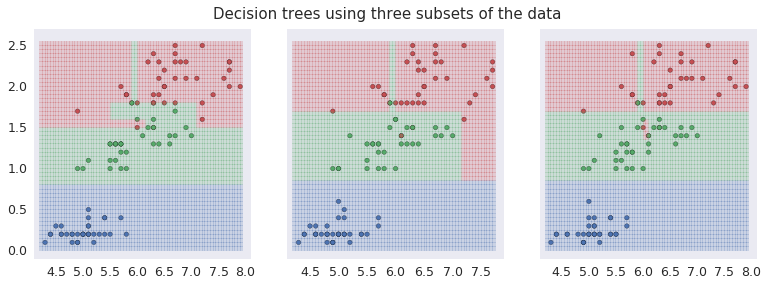

In [14]:
uniqueSpecies = df.species.unique()
colorsMap = dict(zip(uniqueSpecies, sns.color_palette()[:len(uniqueSpecies)]))

sns.set(font_scale=1.25)
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(11, 4), squeeze=True)
fig.tight_layout()

for idx in range(0, 3):
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(
        X, y, test_size=0.3, random_state=idx)    
    clf = tree.DecisionTreeClassifier().fit(X_train, y_train)
    colors = [colorsMap[item] for item in y_train]
    mesh_plot(X_train[:, 0], X_train[:, 1], y_train, colors, ax[idx], clf)
fig.suptitle('Decision trees using three subsets of the data', y=1.00)

A similar plot shows a Random Forest Classifier with 500 trees each time used to select various sub-samples of the dataset. This controls over-fitting.

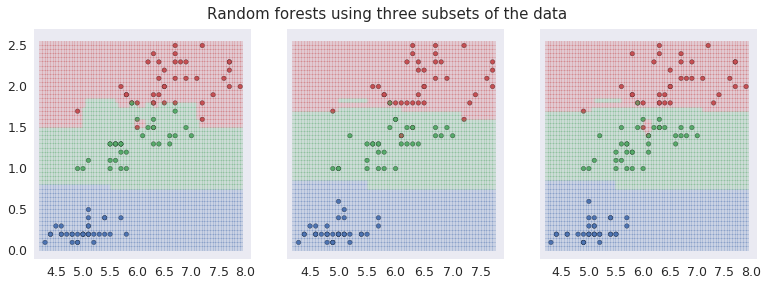

In [16]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(11, 4), squeeze=True)
fig.tight_layout()

for idx in range(0, 3):
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(
        X, y, test_size=0.3, random_state=idx)    
    clf = RandomForestClassifier(n_estimators=500).fit(X_train, y_train)
    colors = [colorsMap[item] for item in y_train]
    mesh_plot(X_train[:, 0], X_train[:, 1], y_train, colors, ax[idx], clf)
    
fig.suptitle('Random forests using three subsets of the data', y=1.00)